In [1]:
import numpy as np
from pydbm.nn.simpleautoencoder.contractive_auto_encoder import ContractiveAutoEncoder
from pydbm.nn.neural_network import NeuralNetwork as Encoder
from pydbm.nn.neural_network import NeuralNetwork as Decoder
from pydbm.nn.nn_layer import NNLayer as EncoderLayer
from pydbm.nn.nn_layer import NNLayer as DecoderLayer
from pydbm.activation.relu_function import ReLuFunction
from pydbm.activation.tanh_function import TanhFunction
from pydbm.activation.identity_function import IdentityFunction
from pydbm.activation.logistic_function import LogisticFunction
from pydbm.loss.mean_squared_error import MeanSquaredError
from pydbm.optimization.optparams.adam import Adam
from pydbm.synapse.nn_graph import NNGraph as EncoderGraph
from pydbm.synapse.nn_graph import NNGraph as DecoderGraph
from pydbm.verification.verificate_function_approximation import VerificateFunctionApproximation
from pydbm.optimization.batch_norm import BatchNorm

from logging import getLogger, StreamHandler, NullHandler, DEBUG, ERROR

logger = getLogger("pydbm")
handler = StreamHandler()
handler.setLevel(DEBUG)
logger.setLevel(DEBUG)
logger.addHandler(handler)

In [2]:
epochs = 1000
batch_size = 50
dim1 = 100
dim2 = 500
scale = 1e-05

In [3]:
encoder_activation_function = LogisticFunction()
#encoder_activation_function.batch_norm = BatchNorm()
decoder_activation_function = IdentityFunction()
#decoder_activation_function.batch_norm = BatchNorm()

In [4]:
encoder_graph = EncoderGraph(
    activation_function=encoder_activation_function,
    hidden_neuron_count=dim1,
    output_neuron_count=dim2,
    scale=scale,
)

encoder_layer = EncoderLayer(encoder_graph)

opt_params = Adam()
opt_params.dropout_rate = 0.5

encoder = Encoder(
    nn_layer_list=[
        encoder_layer, 
    ],
    epochs=epochs,
    batch_size=batch_size,
    learning_rate=1e-01,
    learning_attenuate_rate=0.1,
    attenuate_epoch=50,
    computable_loss=MeanSquaredError(grad_clip_threshold=1e+10),
    opt_params=opt_params,
    verificatable_result=VerificateFunctionApproximation(),
    test_size_rate=0.3,
    tol=1e-15
)

Setup NN layers and the parameters.


In [5]:
decoder_graph = DecoderGraph(
    activation_function=decoder_activation_function,
    hidden_neuron_count=dim2,
    output_neuron_count=dim1,
    scale=scale,
)
decoder_graph.tied_graph = encoder_graph

decoder_layer = DecoderLayer(decoder_graph)

opt_params = Adam()
opt_params.dropout_rate = 0.5

decoder = Decoder(
    nn_layer_list=[
        decoder_layer, 
    ],
    epochs=epochs,
    batch_size=batch_size,
    learning_rate=1e-01,
    learning_attenuate_rate=0.1,
    attenuate_epoch=50,
    computable_loss=MeanSquaredError(grad_clip_threshold=1e+10),
    opt_params=opt_params,
    verificatable_result=VerificateFunctionApproximation(),
    test_size_rate=0.3,
    tol=1e-15
)

Setup NN layers and the parameters.


In [6]:
auto_encoder = ContractiveAutoEncoder(
    encoder=encoder,
    decoder=decoder,
    epochs=epochs,
    batch_size=batch_size,
    learning_rate=1e-01,
    learning_attenuate_rate=0.1,
    attenuate_epoch=50,
    computable_loss=MeanSquaredError(grad_clip_threshold=1e+10),
    verificatable_result=VerificateFunctionApproximation(),
    test_size_rate=0.3,
    tol=1e-15
)

Setup NN layers and the parameters.


In [7]:
observed_arr = np.random.normal(loc=0.0, scale=1.0, size=(1000, dim1))
observed_arr = (observed_arr - observed_arr.mean()) / (observed_arr.std())

In [8]:
# Positive hyperparameter that controls the strength of the regularization.
auto_encoder.penalty_lambda = 1e-05

In [9]:
auto_encoder.learn(observed_arr=observed_arr, target_arr=observed_arr)

NN starts learning.
Best params are updated.
Epoch: 1
Loss: 
Training: 0.9928250506993256 Test: 2.087421439748838
Epoch: 2
Loss: 
Training: 2.775029790600879 Test: 2.78381293736667
Epoch: 3
Loss: 
Training: 4.865600618832811 Test: 4.054767169556278
Epoch: 4
Loss: 
Training: 8.864269806711786 Test: 4.316400102595504
Epoch: 5
Loss: 
Training: 8.07180476364713 Test: 3.6536370351378595
Epoch: 6
Loss: 
Training: 6.264423211085205 Test: 3.7155613166301076
Epoch: 7
Loss: 
Training: 5.839623304593101 Test: 4.010468196812489
Epoch: 8
Loss: 
Training: 5.1365198770188405 Test: 3.674682765496803
Epoch: 9
Loss: 
Training: 6.393472820060461 Test: 2.7656163753681366
Epoch: 10
Loss: 
Training: 5.9356314540670985 Test: 3.108507805130708
Epoch: 11
Loss: 
Training: 5.302546855394119 Test: 3.372690493265484
Rolling mean of Loss (Window is 10): 
Training: 5.513920069731664 Test: 3.4170875143843396
Epoch: 12
Loss: 
Training: 6.369532568631907 Test: 3.509932059502874
Rolling mean of Loss (Window is 10): 
Tra

Rolling mean of Loss (Window is 10): 
Training: 3.0846761487710577 Test: 0.6838709945111976
Epoch: 58
Loss: 
Training: 2.721216470758968 Test: 0.38304494476632345
Rolling mean of Loss (Window is 10): 
Training: 3.063096640657315 Test: 0.6354286839527509
Epoch: 59
Loss: 
Training: 2.1486726218451877 Test: 0.4797069255254091
Rolling mean of Loss (Window is 10): 
Training: 3.021902804654706 Test: 0.5766127888301646
Epoch: 60
Loss: 
Training: 2.298079510141492 Test: 0.4760300967369838
Rolling mean of Loss (Window is 10): 
Training: 2.8909285465825296 Test: 0.5445061964908829
Epoch: 61
Loss: 
Training: 2.663137770769945 Test: 0.45333066995819626
Rolling mean of Loss (Window is 10): 
Training: 2.8272339236378525 Test: 0.5064218973031351
Epoch: 62
Loss: 
Training: 2.1340819702708984 Test: 0.4757265697539823
Rolling mean of Loss (Window is 10): 
Training: 2.7186179654287965 Test: 0.4776217204188102
Epoch: 63
Loss: 
Training: 2.792568052003013 Test: 0.5300261342583733
Rolling mean of Loss (Wind

Epoch: 108
Loss: 
Training: 2.151091633606795 Test: 0.33149819112199613
Rolling mean of Loss (Window is 10): 
Training: 1.857836476517346 Test: 0.35976141945618406
Epoch: 109
Loss: 
Training: 2.006239257997854 Test: 0.3333599442829251
Rolling mean of Loss (Window is 10): 
Training: 1.9193560437593664 Test: 0.35940699482194455
Epoch: 110
Loss: 
Training: 1.899429529508001 Test: 0.33574959765447226
Rolling mean of Loss (Window is 10): 
Training: 1.9531322865005567 Test: 0.35915191268870156
Epoch: 111
Loss: 
Training: 1.9360787668888304 Test: 0.33892457687415684
Rolling mean of Loss (Window is 10): 
Training: 1.9289812641952444 Test: 0.3549461768807144
Epoch: 112
Loss: 
Training: 2.047207548188007 Test: 0.3207618094287453
Rolling mean of Loss (Window is 10): 
Training: 1.9326612336206797 Test: 0.3572656529257363
Epoch: 113
Loss: 
Training: 1.7364361767640337 Test: 0.29357229937041995
Rolling mean of Loss (Window is 10): 
Training: 1.9515502614477007 Test: 0.350870819441646
Epoch: 114
Loss

Epoch: 158
Loss: 
Training: 1.7354854219427798 Test: 0.33106114036246015
Rolling mean of Loss (Window is 10): 
Training: 1.8332820865284583 Test: 0.3256730002222024
Epoch: 159
Loss: 
Training: 1.7927173483157137 Test: 0.3555549207056282
Rolling mean of Loss (Window is 10): 
Training: 1.8325566611764734 Test: 0.3264646992921535
Epoch: 160
Loss: 
Training: 1.7350093416072245 Test: 0.29566277557505566
Rolling mean of Loss (Window is 10): 
Training: 1.8396302118375742 Test: 0.32621045985675445
Epoch: 161
Loss: 
Training: 1.8837150440371253 Test: 0.3327274390342849
Rolling mean of Loss (Window is 10): 
Training: 1.808950255383938 Test: 0.32247994759789395
Epoch: 162
Loss: 
Training: 1.6283512826822015 Test: 0.32687020206711953
Rolling mean of Loss (Window is 10): 
Training: 1.8062622914040005 Test: 0.3256398824657615
Epoch: 163
Loss: 
Training: 1.8535025458653072 Test: 0.37644160640877006
Rolling mean of Loss (Window is 10): 
Training: 1.8091052612751917 Test: 0.32418892558308926
Epoch: 164

Epoch: 208
Loss: 
Training: 1.7322354282275392 Test: 0.3020865638889905
Rolling mean of Loss (Window is 10): 
Training: 1.806274672206433 Test: 0.3281859724864873
Epoch: 209
Loss: 
Training: 1.7637998157479629 Test: 0.28344226231727815
Rolling mean of Loss (Window is 10): 
Training: 1.7958719322504941 Test: 0.32486470526717237
Epoch: 210
Loss: 
Training: 1.7021691597941107 Test: 0.3366033390735329
Rolling mean of Loss (Window is 10): 
Training: 1.7849667725604696 Test: 0.3239280110705509
Epoch: 211
Loss: 
Training: 1.8253611406943295 Test: 0.29925145072154047
Rolling mean of Loss (Window is 10): 
Training: 1.789565698158837 Test: 0.32850418114227314
Epoch: 212
Loss: 
Training: 1.6445046053206016 Test: 0.32404920125648257
Rolling mean of Loss (Window is 10): 
Training: 1.7728993182209933 Test: 0.3281227165111003
Epoch: 213
Loss: 
Training: 1.7567471698669033 Test: 0.32535303129009774
Rolling mean of Loss (Window is 10): 
Training: 1.7525972474585825 Test: 0.3248340529098067
Epoch: 214
L

Epoch: 258
Loss: 
Training: 1.8595304353035131 Test: 0.3359681144923556
Rolling mean of Loss (Window is 10): 
Training: 1.8407678571190094 Test: 0.33724303721263127
Epoch: 259
Loss: 
Training: 2.014794100529169 Test: 0.3086030336556192
Rolling mean of Loss (Window is 10): 
Training: 1.8378377099026573 Test: 0.3395810767212912
Epoch: 260
Loss: 
Training: 2.0318840890444676 Test: 0.31268385443751656
Rolling mean of Loss (Window is 10): 
Training: 1.85533373911101 Test: 0.3344595358982073
Epoch: 261
Loss: 
Training: 1.817160282234068 Test: 0.3791112827561351
Rolling mean of Loss (Window is 10): 
Training: 1.8597082403219907 Test: 0.3330859766786026
Epoch: 262
Loss: 
Training: 1.9848016427503754 Test: 0.3322354138073845
Rolling mean of Loss (Window is 10): 
Training: 1.8470706887926382 Test: 0.33934575950819446
Epoch: 263
Loss: 
Training: 1.706139730673064 Test: 0.36058092472580044
Rolling mean of Loss (Window is 10): 
Training: 1.8889617912498298 Test: 0.3350874326429053
Epoch: 264
Loss: 

Epoch: 308
Loss: 
Training: 1.9096160170172993 Test: 0.29227351392751444
Rolling mean of Loss (Window is 10): 
Training: 1.7781781101386067 Test: 0.3233254016533737
Epoch: 309
Loss: 
Training: 2.101639495770292 Test: 0.312337313895706
Rolling mean of Loss (Window is 10): 
Training: 1.7867183882392434 Test: 0.3195882127255637
Epoch: 310
Loss: 
Training: 1.7451818256259801 Test: 0.3807559660756661
Rolling mean of Loss (Window is 10): 
Training: 1.8423151736812535 Test: 0.3155016864346897
Epoch: 311
Loss: 
Training: 1.9204879899337666 Test: 0.36571166867376015
Rolling mean of Loss (Window is 10): 
Training: 1.8310480095155826 Test: 0.3206821522404121
Epoch: 312
Loss: 
Training: 1.9297920611984933 Test: 0.31021398814188533
Rolling mean of Loss (Window is 10): 
Training: 1.8580069471211502 Test: 0.32546658677532375
Epoch: 313
Loss: 
Training: 1.9465545145645462 Test: 0.3007815995286967
Rolling mean of Loss (Window is 10): 
Training: 1.8565068558758564 Test: 0.3242425790565325
Epoch: 314
Los

Epoch: 358
Loss: 
Training: 1.7579542426211359 Test: 0.3059223133969754
Rolling mean of Loss (Window is 10): 
Training: 1.7935932510740116 Test: 0.3200156199358194
Epoch: 359
Loss: 
Training: 1.8731243642396556 Test: 0.37446293997695873
Rolling mean of Loss (Window is 10): 
Training: 1.8057710494549197 Test: 0.31972934322638547
Epoch: 360
Loss: 
Training: 1.8218587573973803 Test: 0.34055672557767386
Rolling mean of Loss (Window is 10): 
Training: 1.7834036033971734 Test: 0.325455386527424
Epoch: 361
Loss: 
Training: 2.058992496298224 Test: 0.3016647705684341
Rolling mean of Loss (Window is 10): 
Training: 1.781106459453327 Test: 0.32790013948662067
Epoch: 362
Loss: 
Training: 2.0106171672462416 Test: 0.3086068452005767
Rolling mean of Loss (Window is 10): 
Training: 1.8129400118277101 Test: 0.3252385985559808
Epoch: 363
Loss: 
Training: 1.812193921264492 Test: 0.3002946066572846
Rolling mean of Loss (Window is 10): 
Training: 1.8670887183045863 Test: 0.32567310710156555
Epoch: 364
Loss

Epoch: 408
Loss: 
Training: 1.9339427915914214 Test: 0.3550358089564872
Rolling mean of Loss (Window is 10): 
Training: 1.8852111618440035 Test: 0.33031528735113663
Epoch: 409
Loss: 
Training: 2.002435036168609 Test: 0.3889409929279025
Rolling mean of Loss (Window is 10): 
Training: 1.8733275178177018 Test: 0.33479848114040567
Epoch: 410
Loss: 
Training: 1.8060789979401675 Test: 0.33537150697939033
Rolling mean of Loss (Window is 10): 
Training: 1.8829428353888797 Test: 0.33912985755244096
Epoch: 411
Loss: 
Training: 1.726346792673428 Test: 0.33429465276168746
Rolling mean of Loss (Window is 10): 
Training: 1.8792761817028834 Test: 0.3412641928274861
Epoch: 412
Loss: 
Training: 1.8264012466856112 Test: 0.31539523578959816
Rolling mean of Loss (Window is 10): 
Training: 1.869569394198853 Test: 0.3380367803191853
Epoch: 413
Loss: 
Training: 1.7127318837989358 Test: 0.3040417467223189
Rolling mean of Loss (Window is 10): 
Training: 1.8472959771973045 Test: 0.33281607410502173
Epoch: 414
L

Epoch: 458
Loss: 
Training: 2.036865562422599 Test: 0.3646676722490064
Rolling mean of Loss (Window is 10): 
Training: 1.8901088289561383 Test: 0.3261015737737138
Epoch: 459
Loss: 
Training: 1.9027774470991898 Test: 0.31949869452107943
Rolling mean of Loss (Window is 10): 
Training: 1.8868957608164343 Test: 0.33052251164401103
Epoch: 460
Loss: 
Training: 1.6865720162217324 Test: 0.3387842633644366
Rolling mean of Loss (Window is 10): 
Training: 1.8800047030684268 Test: 0.33021111675599635
Epoch: 461
Loss: 
Training: 1.8055435073348967 Test: 0.3325027414100915
Rolling mean of Loss (Window is 10): 
Training: 1.884201175395479 Test: 0.3309645796320659
Epoch: 462
Loss: 
Training: 1.8168757013700896 Test: 0.31716836440722784
Rolling mean of Loss (Window is 10): 
Training: 1.8561931890848495 Test: 0.32738984918993913
Epoch: 463
Loss: 
Training: 1.6361912451508707 Test: 0.29218636213683014
Rolling mean of Loss (Window is 10): 
Training: 1.8778085419107686 Test: 0.327692040846875
Epoch: 464
Lo

Epoch: 508
Loss: 
Training: 1.951056791593998 Test: 0.31705873627194686
Rolling mean of Loss (Window is 10): 
Training: 1.9103532175024434 Test: 0.33120054467773913
Epoch: 509
Loss: 
Training: 1.814788125585158 Test: 0.3152943240241484
Rolling mean of Loss (Window is 10): 
Training: 1.8987746377487131 Test: 0.32889778147600335
Epoch: 510
Loss: 
Training: 1.9460181978847875 Test: 0.3680767482292611
Rolling mean of Loss (Window is 10): 
Training: 1.8952592210880723 Test: 0.32873477946585966
Epoch: 511
Loss: 
Training: 1.954833298849321 Test: 0.30060279174431426
Rolling mean of Loss (Window is 10): 
Training: 1.8990299339761514 Test: 0.33455342707536845
Epoch: 512
Loss: 
Training: 1.7447605293028239 Test: 0.3509887112139145
Rolling mean of Loss (Window is 10): 
Training: 1.9014071130634391 Test: 0.3280571183496182
Epoch: 513
Loss: 
Training: 1.780836222100328 Test: 0.3685437459754267
Rolling mean of Loss (Window is 10): 
Training: 1.8867499937626309 Test: 0.33256953550783475
Epoch: 514
Lo

Epoch: 558
Loss: 
Training: 2.034402577504215 Test: 0.29836313605061343
Rolling mean of Loss (Window is 10): 
Training: 1.8298448113417507 Test: 0.3171751430922759
Epoch: 559
Loss: 
Training: 1.9363563587865553 Test: 0.3636785769277277
Rolling mean of Loss (Window is 10): 
Training: 1.8466210336697024 Test: 0.31391737847394763
Epoch: 560
Loss: 
Training: 1.8864194262284746 Test: 0.31744882097349025
Rolling mean of Loss (Window is 10): 
Training: 1.8577543721385823 Test: 0.3203975042804315
Epoch: 561
Loss: 
Training: 1.8939403230185257 Test: 0.3773412751536405
Rolling mean of Loss (Window is 10): 
Training: 1.8730350102506947 Test: 0.32126481741654894
Epoch: 562
Loss: 
Training: 1.8658302649791412 Test: 0.3760769389459161
Rolling mean of Loss (Window is 10): 
Training: 1.8650269988264463 Test: 0.3251531071981306
Epoch: 563
Loss: 
Training: 2.042229862545565 Test: 0.35700176554189555
Rolling mean of Loss (Window is 10): 
Training: 1.8831569485062896 Test: 0.3328538802956501
Epoch: 564
Lo

Epoch: 608
Loss: 
Training: 1.8323486472061787 Test: 0.3192144728718856
Rolling mean of Loss (Window is 10): 
Training: 1.9087129345802372 Test: 0.3328383707212314
Epoch: 609
Loss: 
Training: 1.8088467343669508 Test: 0.3081975701341728
Rolling mean of Loss (Window is 10): 
Training: 1.8950562333412146 Test: 0.33493907032517334
Epoch: 610
Loss: 
Training: 1.9272131265505152 Test: 0.2971384462824695
Rolling mean of Loss (Window is 10): 
Training: 1.8988588769712489 Test: 0.33345748691360766
Epoch: 611
Loss: 
Training: 1.6884571265609736 Test: 0.3391285031777247
Rolling mean of Loss (Window is 10): 
Training: 1.8909122504519444 Test: 0.32780087187100926
Epoch: 612
Loss: 
Training: 1.5201144069957953 Test: 0.2934567611709772
Rolling mean of Loss (Window is 10): 
Training: 1.873255998436268 Test: 0.32418490396243227
Epoch: 613
Loss: 
Training: 1.7672279009077356 Test: 0.35508258677863797
Rolling mean of Loss (Window is 10): 
Training: 1.8225100799513918 Test: 0.32256654068722884
Epoch: 614


Epoch: 658
Loss: 
Training: 1.7635741740042599 Test: 0.32801239978130886
Rolling mean of Loss (Window is 10): 
Training: 1.8803741495387356 Test: 0.31385833408542985
Epoch: 659
Loss: 
Training: 1.8018758032658537 Test: 0.29632560142140096
Rolling mean of Loss (Window is 10): 
Training: 1.8745099218740884 Test: 0.3133123581249627
Epoch: 660
Loss: 
Training: 1.754359483442842 Test: 0.3379931227164524
Rolling mean of Loss (Window is 10): 
Training: 1.8721212833401508 Test: 0.30935824216964575
Epoch: 661
Loss: 
Training: 1.927784024075571 Test: 0.32494770845419935
Rolling mean of Loss (Window is 10): 
Training: 1.8375638314962468 Test: 0.3129287774494365
Epoch: 662
Loss: 
Training: 1.9320274301599318 Test: 0.3215151362567477
Rolling mean of Loss (Window is 10): 
Training: 1.8344415480339218 Test: 0.3138531814671763
Epoch: 663
Loss: 
Training: 1.7147017104213853 Test: 0.2937074301378625
Rolling mean of Loss (Window is 10): 
Training: 1.8708544846401014 Test: 0.31664779761092354
Epoch: 664
L

Epoch: 708
Loss: 
Training: 1.734720694135737 Test: 0.3231842872386137
Rolling mean of Loss (Window is 10): 
Training: 1.9115341629956994 Test: 0.33087718384399745
Epoch: 709
Loss: 
Training: 1.5354744816688566 Test: 0.2980671460453974
Rolling mean of Loss (Window is 10): 
Training: 1.9083244226835805 Test: 0.33100790119758877
Epoch: 710
Loss: 
Training: 1.7494183339528302 Test: 0.3017516147293701
Rolling mean of Loss (Window is 10): 
Training: 1.8576161606589914 Test: 0.32992816814649517
Epoch: 711
Loss: 
Training: 1.5955127329366046 Test: 0.3066483145775802
Rolling mean of Loss (Window is 10): 
Training: 1.834067857119615 Test: 0.32210204217477
Epoch: 712
Loss: 
Training: 1.7483188610960445 Test: 0.38444040332168533
Rolling mean of Loss (Window is 10): 
Training: 1.829417986856886 Test: 0.3194049474895409
Epoch: 713
Loss: 
Training: 1.9530663426170585 Test: 0.3150829996735428
Rolling mean of Loss (Window is 10): 
Training: 1.8393059862796828 Test: 0.32463067423249875
Epoch: 714
Loss:

Epoch: 758
Loss: 
Training: 1.8177060616454492 Test: 0.31272756353927145
Rolling mean of Loss (Window is 10): 
Training: 1.8222515953875842 Test: 0.32074719780530864
Epoch: 759
Loss: 
Training: 1.8767298320273185 Test: 0.36524940540086337
Rolling mean of Loss (Window is 10): 
Training: 1.8142442794993674 Test: 0.32105877070835664
Epoch: 760
Loss: 
Training: 1.697344546601736 Test: 0.3561362142643111
Rolling mean of Loss (Window is 10): 
Training: 1.8360238507717308 Test: 0.3270531041585124
Epoch: 761
Loss: 
Training: 1.9986726866797253 Test: 0.33766515480644715
Rolling mean of Loss (Window is 10): 
Training: 1.8303054858126786 Test: 0.3329673139454482
Epoch: 762
Loss: 
Training: 1.5563052423413868 Test: 0.34011066567270726
Rolling mean of Loss (Window is 10): 
Training: 1.871782460283704 Test: 0.33538821941328917
Epoch: 763
Loss: 
Training: 1.7037568777330347 Test: 0.3402611588094686
Rolling mean of Loss (Window is 10): 
Training: 1.831492777022736 Test: 0.3324994349975725
Epoch: 764
L

Epoch: 808
Loss: 
Training: 1.8340927395290396 Test: 0.318473955902781
Rolling mean of Loss (Window is 10): 
Training: 1.9256972277703632 Test: 0.34831183142760913
Epoch: 809
Loss: 
Training: 1.6308370048542975 Test: 0.27581348621281987
Rolling mean of Loss (Window is 10): 
Training: 1.9173498531117048 Test: 0.3429572802072061
Epoch: 810
Loss: 
Training: 1.6747085034032738 Test: 0.33738903738877035
Rolling mean of Loss (Window is 10): 
Training: 1.9168594901512783 Test: 0.3382875574105458
Epoch: 811
Loss: 
Training: 1.8985313903654955 Test: 0.32552347366545703
Rolling mean of Loss (Window is 10): 
Training: 1.8795066447003415 Test: 0.34024634094115075
Epoch: 812
Loss: 
Training: 1.6263257511110512 Test: 0.3686299823746156
Rolling mean of Loss (Window is 10): 
Training: 1.8943598495419292 Test: 0.3388569484399314
Epoch: 813
Loss: 
Training: 1.4783335621197768 Test: 0.3074267551064832
Rolling mean of Loss (Window is 10): 
Training: 1.8651624336074513 Test: 0.33682994445506764
Epoch: 814


Epoch: 858
Loss: 
Training: 1.8194343875633974 Test: 0.3927681476320547
Rolling mean of Loss (Window is 10): 
Training: 1.7686613540651759 Test: 0.3190321298868655
Epoch: 859
Loss: 
Training: 2.039087071806774 Test: 0.3584881772222197
Rolling mean of Loss (Window is 10): 
Training: 1.7810929420774333 Test: 0.3286059704637014
Epoch: 860
Loss: 
Training: 2.0121756883827713 Test: 0.3232032330751145
Rolling mean of Loss (Window is 10): 
Training: 1.7981785803713102 Test: 0.3290256928293235
Epoch: 861
Loss: 
Training: 1.6547685344537517 Test: 0.3555381780842988
Rolling mean of Loss (Window is 10): 
Training: 1.8042662984154503 Test: 0.331457199723458
Epoch: 862
Loss: 
Training: 1.601090916143452 Test: 0.2996902380659937
Rolling mean of Loss (Window is 10): 
Training: 1.7749273096384683 Test: 0.33251003480483554
Epoch: 863
Loss: 
Training: 1.7941690085298259 Test: 0.29195050743008283
Rolling mean of Loss (Window is 10): 
Training: 1.7800798249513672 Test: 0.3329064104671266
Epoch: 864
Loss: 

Epoch: 908
Loss: 
Training: 1.9006975567053586 Test: 0.3098074924108191
Rolling mean of Loss (Window is 10): 
Training: 1.8720258375726266 Test: 0.31830517382498824
Epoch: 909
Loss: 
Training: 1.5473059945124776 Test: 0.3062024985062919
Rolling mean of Loss (Window is 10): 
Training: 1.8804143855307092 Test: 0.316640806064115
Epoch: 910
Loss: 
Training: 1.7725937307190842 Test: 0.2879227435889093
Rolling mean of Loss (Window is 10): 
Training: 1.8386838058645278 Test: 0.3190969676948231
Epoch: 911
Loss: 
Training: 1.5231106340055722 Test: 0.318697886196414
Rolling mean of Loss (Window is 10): 
Training: 1.8406272153390213 Test: 0.318144547119409
Epoch: 912
Loss: 
Training: 1.9462609610508892 Test: 0.3111654595837885
Rolling mean of Loss (Window is 10): 
Training: 1.7967218052249887 Test: 0.3209034952686364
Epoch: 913
Loss: 
Training: 2.0487603135652406 Test: 0.3649865950387654
Rolling mean of Loss (Window is 10): 
Training: 1.8188110914539446 Test: 0.3201135799252686
Epoch: 914
Loss: 


Epoch: 958
Loss: 
Training: 1.9010897597157141 Test: 0.31547193000951856
Rolling mean of Loss (Window is 10): 
Training: 1.8064487258275783 Test: 0.3163749177495315
Epoch: 959
Loss: 
Training: 1.8394415125971435 Test: 0.30839637641679923
Rolling mean of Loss (Window is 10): 
Training: 1.8223392811598178 Test: 0.31672883750899683
Epoch: 960
Loss: 
Training: 2.0652808395858164 Test: 0.3264148635833928
Rolling mean of Loss (Window is 10): 
Training: 1.8199963165238735 Test: 0.3137146042496209
Epoch: 961
Loss: 
Training: 2.0593039941331335 Test: 0.29556655399965703
Rolling mean of Loss (Window is 10): 
Training: 1.8428553022071512 Test: 0.3126765774010917
Epoch: 962
Loss: 
Training: 1.9159375686038416 Test: 0.323247346800502
Rolling mean of Loss (Window is 10): 
Training: 1.8841417019605058 Test: 0.3131818636477979
Epoch: 963
Loss: 
Training: 1.53238309944541 Test: 0.33157329736555174
Rolling mean of Loss (Window is 10): 
Training: 1.8921694684418546 Test: 0.31346056819126783
Epoch: 964
Lo

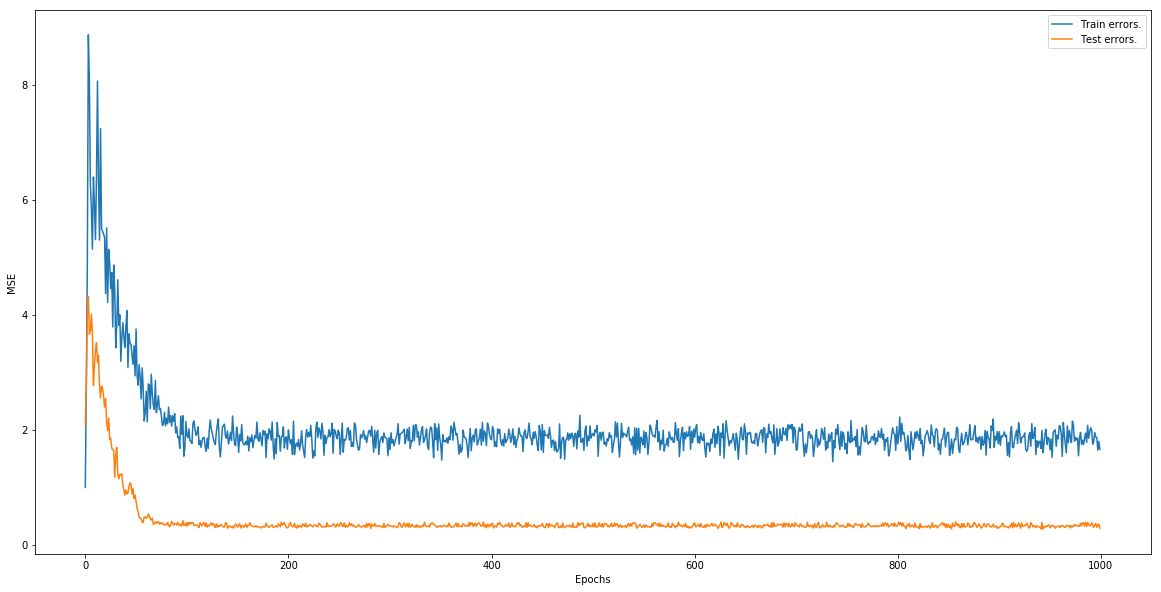

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
_ = plt.figure(figsize=(20, 10))
plt.plot(auto_encoder.verificatable_result.logs_df.train_loss.values, label="Train errors.")
plt.plot(auto_encoder.verificatable_result.logs_df.test_loss.values, label="Test errors.")
plt.legend()
plt.ylabel("MSE")
plt.xlabel("Epochs")
plt.show()
plt.close()